In [17]:
import numpy as np
import pandas as pd
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer




[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\79140\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

Clean the natural language in each post

In [6]:
#import dataset
data = pd.read_csv('C:/Users/79140/OneDrive/桌面/mcmaster/788/kaggle/archive/mbti_1.csv')
post = data['posts']
print(data.head())


   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...


In [7]:
#remove url
count = 0
for i in range(len(post)):
    postlist = post[i].split('|||')
    for j in range(len(postlist)):
        if 'http://' in postlist[j] or 'https://' in postlist[j]:
            postlist[j] = ''
            count += 1
    post[i] = postlist
print("There are "+str(count)+" url have been removed from text"+'\n')
print('exmaple:'+'\n', post[0])
    

There are 25223 url have been removed from text

exmaple:
 ['', '', '', 'What has been the most life-changing experience in your life?', '', 'May the PerC Experience immerse you.', '', "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...", '', 'Welcome and stuff.', '', "Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...", "Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types' cognitive functions and whatnot, when left by...", 'All things in moderation.  Sims is indeed a video game, and a good one at that. Note: a good one at that is somewhat subjective in that I am not completely promoting the dea

In [9]:
# remove_punctuation and number:

for i in range(len(post)):
    temp = post[i]
    for j in range(len(temp)):
        temp[j] = re.sub('[^a-zA-Z]', ' ', temp[j])
    post[i] = temp



print("Punctuations have been removed from text"+'\n')
print('example\n', post[0])


Punctuations have been removed from text

example
 ['', '', '', 'What has been the most life changing experience in your life ', '', 'May the PerC Experience immerse you ', '', 'Hello ENFJ   Sorry to hear of your distress  It s only natural for a relationship to not be perfection all the time in every moment of existence  Try to figure the hard times as times of growth  as   ', '', 'Welcome and stuff ', '', 'Prozac  wellbrutin  at least thirty minutes of moving your legs  and I don t mean moving them while sitting in your same desk chair   weed in moderation  maybe try edibles as a healthier alternative   ', 'Basically come up with three items you ve determined that each type  or whichever types you want to do  would more than likely use  given each types  cognitive functions and whatnot  when left by   ', 'All things in moderation   Sims is indeed a video game  and a good one at that  Note  a good one at that is somewhat subjective in that I am not completely promoting the death of an

In [10]:
#convert into lowercase
for i in range(len(post)):
    temp = post[i]
    for j in range(len(temp)):
        temp[j] = temp[j].lower()
    post[i] = temp

print("All text have been converted into lowercase\n")
print('example\n', post[0])


All text have been converted into lowercase

example
 ['', '', '', 'what has been the most life changing experience in your life ', '', 'may the perc experience immerse you ', '', 'hello enfj   sorry to hear of your distress  it s only natural for a relationship to not be perfection all the time in every moment of existence  try to figure the hard times as times of growth  as   ', '', 'welcome and stuff ', '', 'prozac  wellbrutin  at least thirty minutes of moving your legs  and i don t mean moving them while sitting in your same desk chair   weed in moderation  maybe try edibles as a healthier alternative   ', 'basically come up with three items you ve determined that each type  or whichever types you want to do  would more than likely use  given each types  cognitive functions and whatnot  when left by   ', 'all things in moderation   sims is indeed a video game  and a good one at that  note  a good one at that is somewhat subjective in that i am not completely promoting the death of

In [11]:
#tokenization
for i in range(len(post)):
    temp = post[i]
    for j in range(len(temp)):
        if temp[j] != '':
            temp[j] = word_tokenize(temp[j])
    post[i] = temp
print('Tokenizers divide strings into lists of substrings\n')

print('example\n', post[0])

tokenizate successfully

example
 ['', '', '', ['what', 'has', 'been', 'the', 'most', 'life', 'changing', 'experience', 'in', 'your', 'life'], '', ['may', 'the', 'perc', 'experience', 'immerse', 'you'], '', ['hello', 'enfj', 'sorry', 'to', 'hear', 'of', 'your', 'distress', 'it', 's', 'only', 'natural', 'for', 'a', 'relationship', 'to', 'not', 'be', 'perfection', 'all', 'the', 'time', 'in', 'every', 'moment', 'of', 'existence', 'try', 'to', 'figure', 'the', 'hard', 'times', 'as', 'times', 'of', 'growth', 'as'], '', ['welcome', 'and', 'stuff'], '', ['prozac', 'wellbrutin', 'at', 'least', 'thirty', 'minutes', 'of', 'moving', 'your', 'legs', 'and', 'i', 'don', 't', 'mean', 'moving', 'them', 'while', 'sitting', 'in', 'your', 'same', 'desk', 'chair', 'weed', 'in', 'moderation', 'maybe', 'try', 'edibles', 'as', 'a', 'healthier', 'alternative'], ['basically', 'come', 'up', 'with', 'three', 'items', 'you', 've', 'determined', 'that', 'each', 'type', 'or', 'whichever', 'types', 'you', 'want', 't

In [12]:
#remove stopword and short word
stop_words = stopwords.words('english')

for i in range(len(post)):
    temp = post[i]
    for j in range(len(temp)):
        temp[j] = [w for w in temp[j] if w not in stop_words]
        temp[j] = [w for w in temp[j] if len(w)>=2]
    post[i] = temp
print('Commonly used words and short words have been removed\n')
print('example\n', post[0])

Commonly used words and short words have been removed
example
 [[], [], [], ['life', 'changing', 'experience', 'life'], [], ['may', 'perc', 'experience', 'immerse'], [], ['hello', 'enfj', 'sorry', 'hear', 'distress', 'natural', 'relationship', 'perfection', 'time', 'every', 'moment', 'existence', 'try', 'figure', 'hard', 'times', 'times', 'growth'], [], ['welcome', 'stuff'], [], ['prozac', 'wellbrutin', 'least', 'thirty', 'minutes', 'moving', 'legs', 'mean', 'moving', 'sitting', 'desk', 'chair', 'weed', 'moderation', 'maybe', 'try', 'edibles', 'healthier', 'alternative'], ['basically', 'come', 'three', 'items', 'determined', 'type', 'whichever', 'types', 'want', 'would', 'likely', 'use', 'given', 'types', 'cognitive', 'functions', 'whatnot', 'left'], ['things', 'moderation', 'sims', 'indeed', 'video', 'game', 'good', 'one', 'note', 'good', 'one', 'somewhat', 'subjective', 'completely', 'promoting', 'death', 'given', 'sim'], ['dear', 'enfp', 'favorite', 'video', 'games', 'growing', 'cur

In [18]:
stemmer = PorterStemmer()
lemma = WordNetLemmatizer()
for i in range(len(post)):
    temp = post[i]
    for j in range(len(temp)):
#         temp[j] = [stemmer.stem(k) for k in temp[j]]
        temp[j] = [lemma.lemmatize(k,pos='v') for k in temp[j]]
    post[i] = temp
print('remove morphological affixes from words, leaving only the word stem.\n')
print('example\n', post[0])

remove morphological affixes from words, leaving only the word stem.

example
 [[], [], [], ['life', 'change', 'experience', 'life'], [], ['may', 'perc', 'experience', 'immerse'], [], ['hello', 'enfj', 'sorry', 'hear', 'distress', 'natural', 'relationship', 'perfection', 'time', 'every', 'moment', 'existence', 'try', 'figure', 'hard', 'time', 'time', 'growth'], [], ['welcome', 'stuff'], [], ['prozac', 'wellbrutin', 'least', 'thirty', 'minutes', 'move', 'legs', 'mean', 'move', 'sit', 'desk', 'chair', 'weed', 'moderation', 'maybe', 'try', 'edibles', 'healthier', 'alternative'], ['basically', 'come', 'three', 'items', 'determine', 'type', 'whichever', 'type', 'want', 'would', 'likely', 'use', 'give', 'type', 'cognitive', 'function', 'whatnot', 'leave'], ['things', 'moderation', 'sims', 'indeed', 'video', 'game', 'good', 'one', 'note', 'good', 'one', 'somewhat', 'subjective', 'completely', 'promote', 'death', 'give', 'sim'], ['dear', 'enfp', 'favorite', 'video', 'game', 'grow', 'current', 

In [10]:
#verti
tokenizer = Tokenizer()
posts = [i[0] for i in post if len(i)!=0]

tokenizer.fit_on_texts(posts)
post = [tokenizer.texts_to_sequences(i) for i in post]

print(post[37])



    

[[], [9, 298, 7, 2, 2601, 768, 2019, 1160, 1294, 8834], [488, 186, 21], [], [5, 1, 201, 181, 1221, 5, 1, 1123, 248, 523, 411, 14, 2219, 1574, 9, 457, 16, 19, 180], [40, 26, 40, 47, 26, 22, 138, 2116, 12, 118, 1820, 119], [56, 77, 72, 6142, 45, 9, 28, 302, 186, 63, 168, 222, 1305], [186, 42, 1, 218, 76, 15, 725, 21, 85, 11, 258, 84, 15, 725, 21], [], [6, 78, 769, 817, 39, 85, 1156, 16, 17, 849, 12, 5, 66, 465, 324], [4, 83, 15, 12, 108, 114, 6, 162, 12, 5, 114, 557, 1, 745, 1, 207, 134], [2130, 472, 563, 50, 16, 99, 1031, 10, 76, 3, 17, 134, 25, 116, 11], [2552, 2294], [30, 18, 59, 32, 221, 50, 126, 8, 209, 358, 125, 1044, 310, 352, 361, 17, 95, 10], [186, 42, 1, 63, 63, 308, 222, 83, 167, 951, 1671, 223, 126, 451, 186], [3081], [123, 115, 4546, 479, 179, 465, 115, 179, 1328, 123, 50, 196, 155, 11, 410, 308, 136, 5], [6, 123, 26, 24, 149, 532, 1137, 32, 10, 2167, 67, 411], [79, 11, 17, 373, 793, 597, 1504, 123, 145, 1100, 185, 17, 429, 56], [21, 6, 631, 100, 11, 480, 123, 142, 164, 12, 

In [11]:
#remove missing value
print(len(post))
for i in range(len(post)):
    post[i] = [j for j in post[i] if j!=[]]
print(post[37])

8675
[[9, 298, 7, 2, 2601, 768, 2019, 1160, 1294, 8834], [488, 186, 21], [5, 1, 201, 181, 1221, 5, 1, 1123, 248, 523, 411, 14, 2219, 1574, 9, 457, 16, 19, 180], [40, 26, 40, 47, 26, 22, 138, 2116, 12, 118, 1820, 119], [56, 77, 72, 6142, 45, 9, 28, 302, 186, 63, 168, 222, 1305], [186, 42, 1, 218, 76, 15, 725, 21, 85, 11, 258, 84, 15, 725, 21], [6, 78, 769, 817, 39, 85, 1156, 16, 17, 849, 12, 5, 66, 465, 324], [4, 83, 15, 12, 108, 114, 6, 162, 12, 5, 114, 557, 1, 745, 1, 207, 134], [2130, 472, 563, 50, 16, 99, 1031, 10, 76, 3, 17, 134, 25, 116, 11], [2552, 2294], [30, 18, 59, 32, 221, 50, 126, 8, 209, 358, 125, 1044, 310, 352, 361, 17, 95, 10], [186, 42, 1, 63, 63, 308, 222, 83, 167, 951, 1671, 223, 126, 451, 186], [3081], [123, 115, 4546, 479, 179, 465, 115, 179, 1328, 123, 50, 196, 155, 11, 410, 308, 136, 5], [6, 123, 26, 24, 149, 532, 1137, 32, 10, 2167, 67, 411], [79, 11, 17, 373, 793, 597, 1504, 123, 145, 1100, 185, 17, 429, 56], [21, 6, 631, 100, 11, 480, 123, 142, 164, 12, 5, 1061

In [12]:
data['posts'] = post
print(data.head())


   type                                              posts
0  INFJ  [[37, 98, 150, 37], [128, 657, 150, 2498], [26...
1  ENTP  [[43, 401, 34, 2109], [346, 298, 352, 140, 247...
2  INTP  [[377, 14, 4, 2313, 2699], [380, 352, 97, 21, ...
3  INTJ  [[353, 53, 173, 249, 64, 2830, 4841, 250, 454,...
4  ENTJ  [[1052], [197, 953, 4178, 534, 368, 15, 1443, ...


In [13]:
#missing value

for x in data.index:
    if data.loc[x, "posts"] == []:
        data.drop(x, inplace = True)
print(data.head())





   type                                              posts
0  INFJ  [[37, 98, 150, 37], [128, 657, 150, 2498], [26...
1  ENTP  [[43, 401, 34, 2109], [346, 298, 352, 140, 247...
2  INTP  [[377, 14, 4, 2313, 2699], [380, 352, 97, 21, ...
3  INTJ  [[353, 53, 173, 249, 64, 2830, 4841, 250, 454,...
4  ENTJ  [[1052], [197, 953, 4178, 534, 368, 15, 1443, ...


In [14]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences

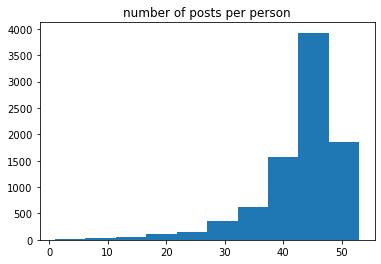

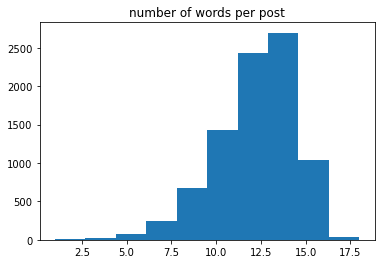

In [15]:
k = [len(i) for i in data['posts']]
plt.hist(k)
plt.title('number of posts per person')
plt.show()
count=[]
for i in data['posts']:
    words = np.mean([len(j) for j in i])
    count.append(words)
plt.hist(count)
plt.title('number of words per post')
plt.show()

In [16]:
#normalize the words per post
post = data['posts'].values
for i in range(len(post)):
    post[i] = pad_sequences(post[i],maxlen=13)
print(post[0])

[[   0    0    0    0    0    0    0    0    0   37   98  150   37]
 [   0    0    0    0    0    0    0    0    0  128  657  150 2498]
 [ 250   74  429   10   80  313  409   23  317  123   10   10 2416]
 [   0    0    0    0    0    0    0    0    0    0    0  227  181]
 [ 701  171 2591   59  171  583 4014 1706 1887   88   23 3925 1028]
 [  13 5359   13   17    8    1   28  633   13  659  163 4377  370]
 [ 179   24    7  419   24    7  805  489  219 7574  525  633 3354]
 [   0    0  353   68  318  479  179  612  255  318  479  179  277]
 [   0    0    0    0    0    0    0    0    0    0  546  297  453]
 [   0    0    0    0    0    0    0    0    0    0    0   36  119]
 [   0    0    0    0    0    0    0    0  478   47  548   24   11]
 [   0    0    0    0    0    0    0 1363   69  790   16   20  266]
 [   0    0    0  485  137 2766 2858   92  249   33 1383 4688 1084]
 [   0    0    0    0    0    0    0    0    0    0 1651   72  569]
 [   0    0    0    6  144 3937  444  249   26  

In [17]:
count = 0
print(len(post))
for i in range(len(post)):
    if len(post[i])>40:
        count+=1
#         post[i] = post[i][0:45]
print(count)    
    

8673
6590


In [26]:
#normalize the posts per person
pad = np.array(13*[0])
for i in range(len(post)):
    if len(post[i])>40:
        post[i]=post[i][0:40]
    else:
        while len(post[i])<40:
            post[i] = np.append(post[i],np.array([pad]),axis=0)


print(post[2])


[[   0    0    0    0    0    0    0    0  377   14    4 2313 2699]
 [ 380  352   97   21   45  430  308  578   55   45   19  335    5]
 [   0    0    0    0    0    0    0    0    0    0    0   30  497]
 [   0    0    0    0    0    0    0    0    0 2142   40    7  113]
 [   0    0    0    0    0    0   29  188 1243  616  585  488  408]
 [   0  764  847  111   29 2716   49   88   33  198  987  668  217]
 [   0  583 1503 1072  201  328 1027  327 7451 4481  115 6487 2344]
 [   0    0    0    0    0    0    0    0   53 1739   72  113  287]
 [   0    0    0    0    0  256   41 1309  367   37  639  358  248]
 [   0  527 1034  299   27   50 4619  332 2298   12 1752   49  184]
 [2348   90   21 8368 4864 3028 3836   34  181   52   23  506   27]
 [ 117 1116 2608 6966 7925  684 1460  372  181  104  118  757   18]
 [   2  940  453  176  185  380 1552  343 2238   54    9    1  544]
 [ 214  305   86  285  123 3223 1288  181  771  212 1432  439  141]
 [   0    0    0    0    0    0    0    0    0  

In [19]:
print(type(post[89][0]))

<class 'numpy.ndarray'>


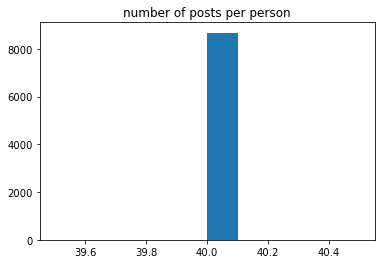

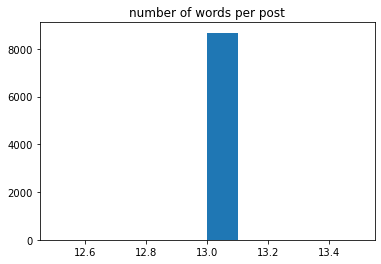

In [20]:

k = [len(i) for i in data['posts']]
plt.hist(k)
plt.title('number of posts per person')
plt.show()
count=[]
for i in data['posts']:
    words = np.mean([len(j) for j in i])
    count.append(words)
plt.hist(count)
plt.title('number of words per post')
plt.show()


In [21]:
data['posts'] = post


In [22]:
print(type(data['posts'][0][0]))

<class 'numpy.ndarray'>


In [23]:
dict = data.to_dict()

In [24]:
print(dict.keys())

dict_keys(['type', 'posts'])


In [25]:
# np.save('data.npy',dict)